In [1]:
import pickle
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import mlab
import seaborn as sns
%matplotlib inline

mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

In [2]:
def RCRPM_loading(RC,RPM,filename,endtype,densitypath):
    with open(densitypath+filename+endtype+'_readcounts.pickle', 'rb') as f:
        RC[filename]=pickle.load(f)
    with open(densitypath+filename+endtype+'_rpm.pickle', 'rb') as f:
        RPM[filename]=pickle.load(f)
    #return [rcs,rpms]

In [3]:
import multiprocessing
import pickle
import threading
from datetime import datetime

print datetime.now()

manager = multiprocessing.Manager()
RC = manager.dict()
RPM = manager.dict()

jobs = []
    
filenames = ['ks61','ks64']
endtype = '_3map'    
densitypath = '/home/kazuki/^profilingdata/20170615_reanalyze/density/'
for filename in filenames:
    job = multiprocessing.Process(target=RCRPM_loading, args=(RC,RPM,filename,endtype,densitypath))
    jobs.append(job)
    job.start()

    
filenames = ['ks170','ks172']
endtype = '_3map'
densitypath = '/home/kazuki/^profilingdata/20190503/density/'
for filename in filenames:
    job = multiprocessing.Process(target=RCRPM_loading, args=(RC,RPM,filename,endtype,densitypath))
    jobs.append(job)
    job.start()   
       
[job.join() for job in jobs] # just to get the time by the below line

print datetime.now()    

2019-07-20 15:08:18.261618
2019-07-20 15:08:42.049862


In [4]:
def rpm_plot_minus(upstream, downstream, readcounts):
    xaxis = range(upstream, downstream+1)
    yaxis =[0 for x in range(upstream, downstream+1)]
    i = 0
    g = upstream-1
    totalread = sum(readcounts)
    while g < downstream:
        yaxis[i]=(readcounts[g]*1E6)/float(totalread)
        i+=1
        g+=1
    yaxis.reverse() 
        # because negative strand
        # x axis is still from upstream to downstrem
        # matplotlib make a bar graph with x axis from smaller number 
        # so the correspondance of x axis and y axis is reversed on the plot
        # I did not yet look for to change the labelling of x axis... 
    return [xaxis,yaxis]


In [5]:
def rpm_plot_plus(upstream, downstream, readcounts):
    xaxis = range(upstream, downstream+1)
    yaxis =[0 for x in range(upstream, downstream+1)]
    i = 0
    g = upstream-1
    totalread = sum(readcounts)
    while g < downstream:
        yaxis[i]=(readcounts[g]*1E6)/float(totalread)
        i+=1
        g+=1 
    return [xaxis,yaxis]

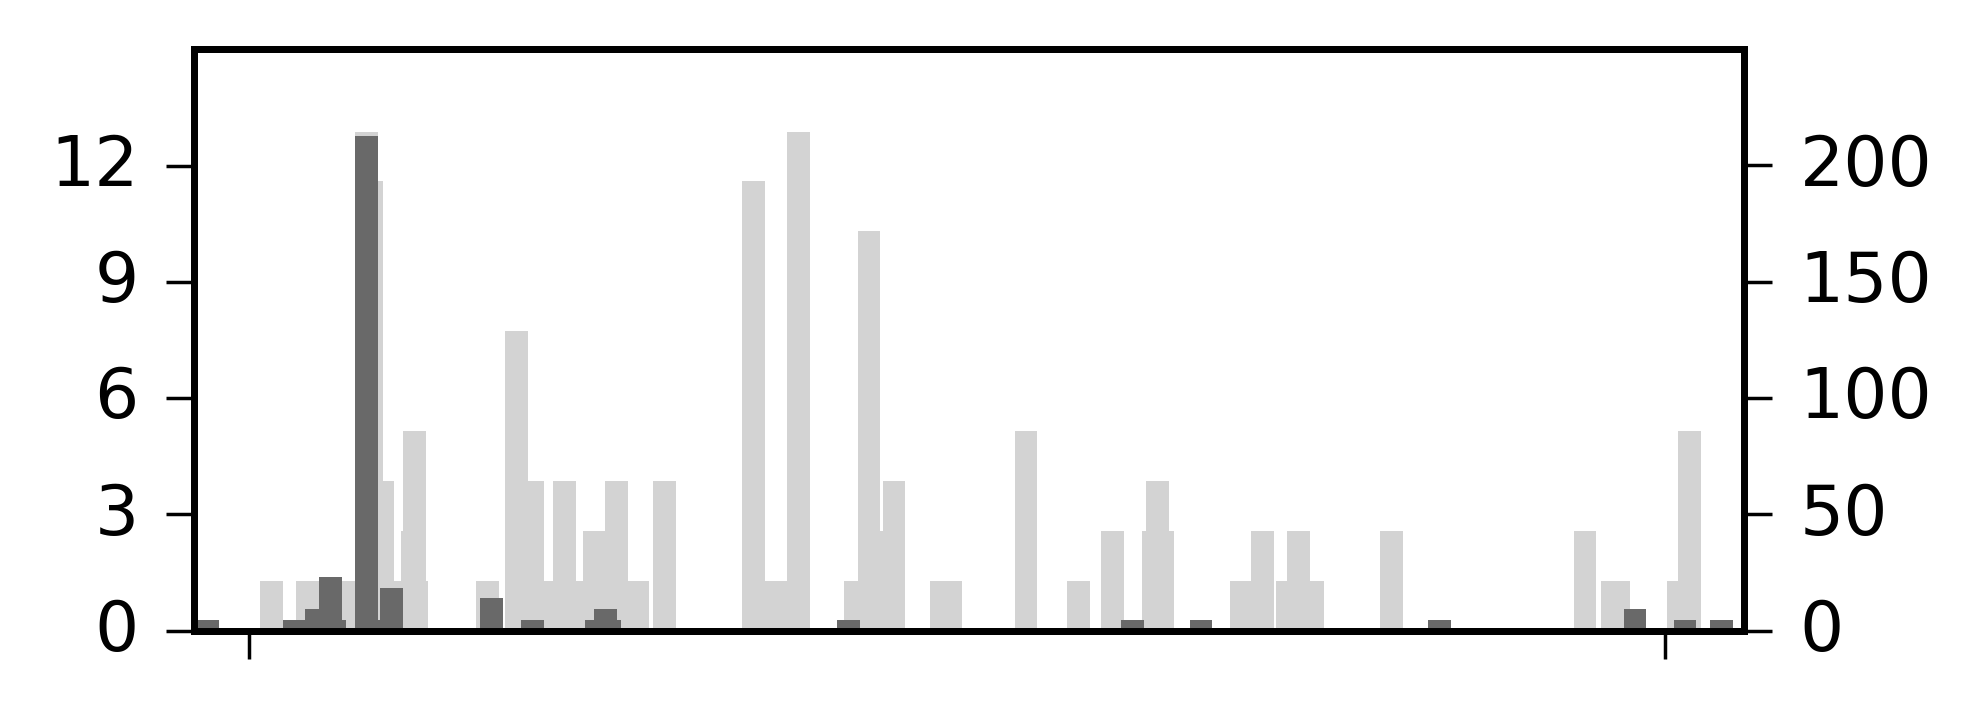

In [6]:
# gmk

AUG = 3819451
length = 623
distance = 25
upstream = AUG-distance
downstream = AUG+length+distance-1
x_data = [x for x in range (1,length+distance*2+1)]

fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(4, 1.5)
plt.xticks([distance,length+distance],['',''])
plt.xlim(0,distance+length+distance)

ax2 = ax.twinx() 

readcounts = RC['ks61'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
ax.bar(x_data,data[1], width=10, color="lightgrey",linewidth = 0)
ax.set_ylim(0,15)
ax.set_yticks([0,3,6,9,12])

readcounts = RC['ks170'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
ax2.bar(x_data,data[1], width=10, color="dimgrey",linewidth = 0)
ax2.set_ylim(0,250)
ax2.set_yticks([0,50,100,150,200])

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#plt.savefig('fig_reta_rpm/reta_gmk_C.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0)

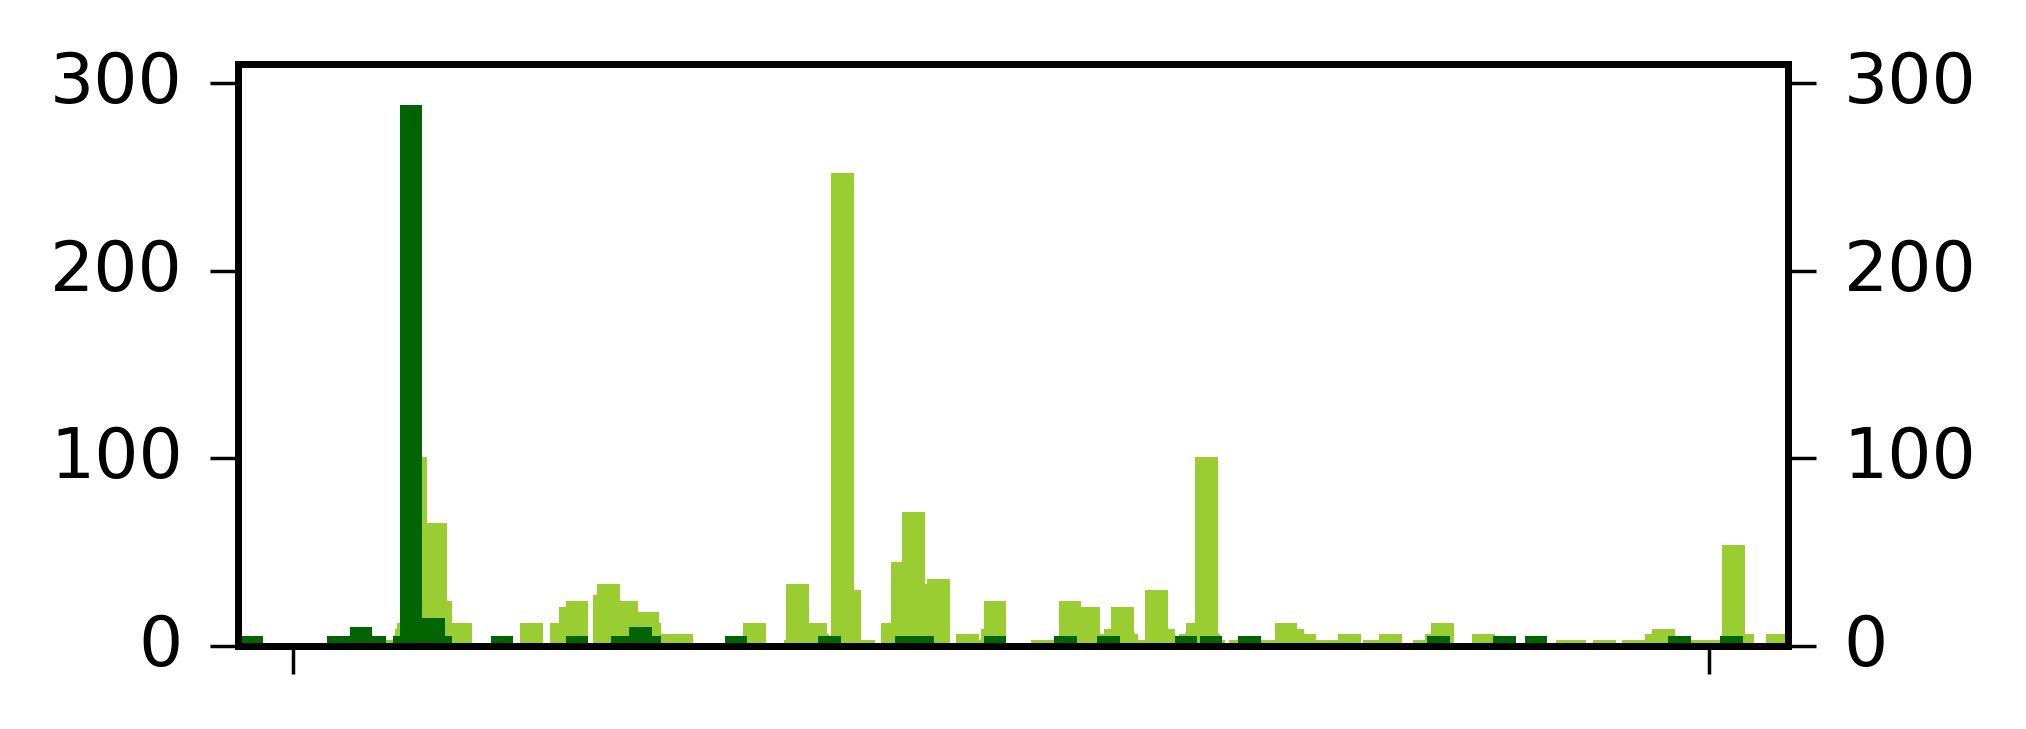

In [7]:
# gmk

AUG = 3819451
length = 623
distance = 25
upstream = AUG-distance
downstream = AUG+length+distance-1
x_data = [x for x in range (1,length+distance*2+1)]

fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(4, 1.5)
plt.xticks([distance,length+distance],['',''])
plt.xlim(0,distance+length+distance)

ax2 = ax.twinx() 

readcounts = RC['ks64'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
ax.bar(x_data,data[1], width=10, color="yellowgreen",linewidth = 0)
ax.set_ylim(0,310)
ax.set_yticks([0,100,200,300])

readcounts = RC['ks172'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
ax2.bar(x_data,data[1], width=10, color="darkgreen",linewidth = 0)
ax2.set_ylim(0,310)
ax2.set_yticks([0,100,200,300])

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#plt.savefig('fig_reta_rpm/reta_gmk_A.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0)

# lpp

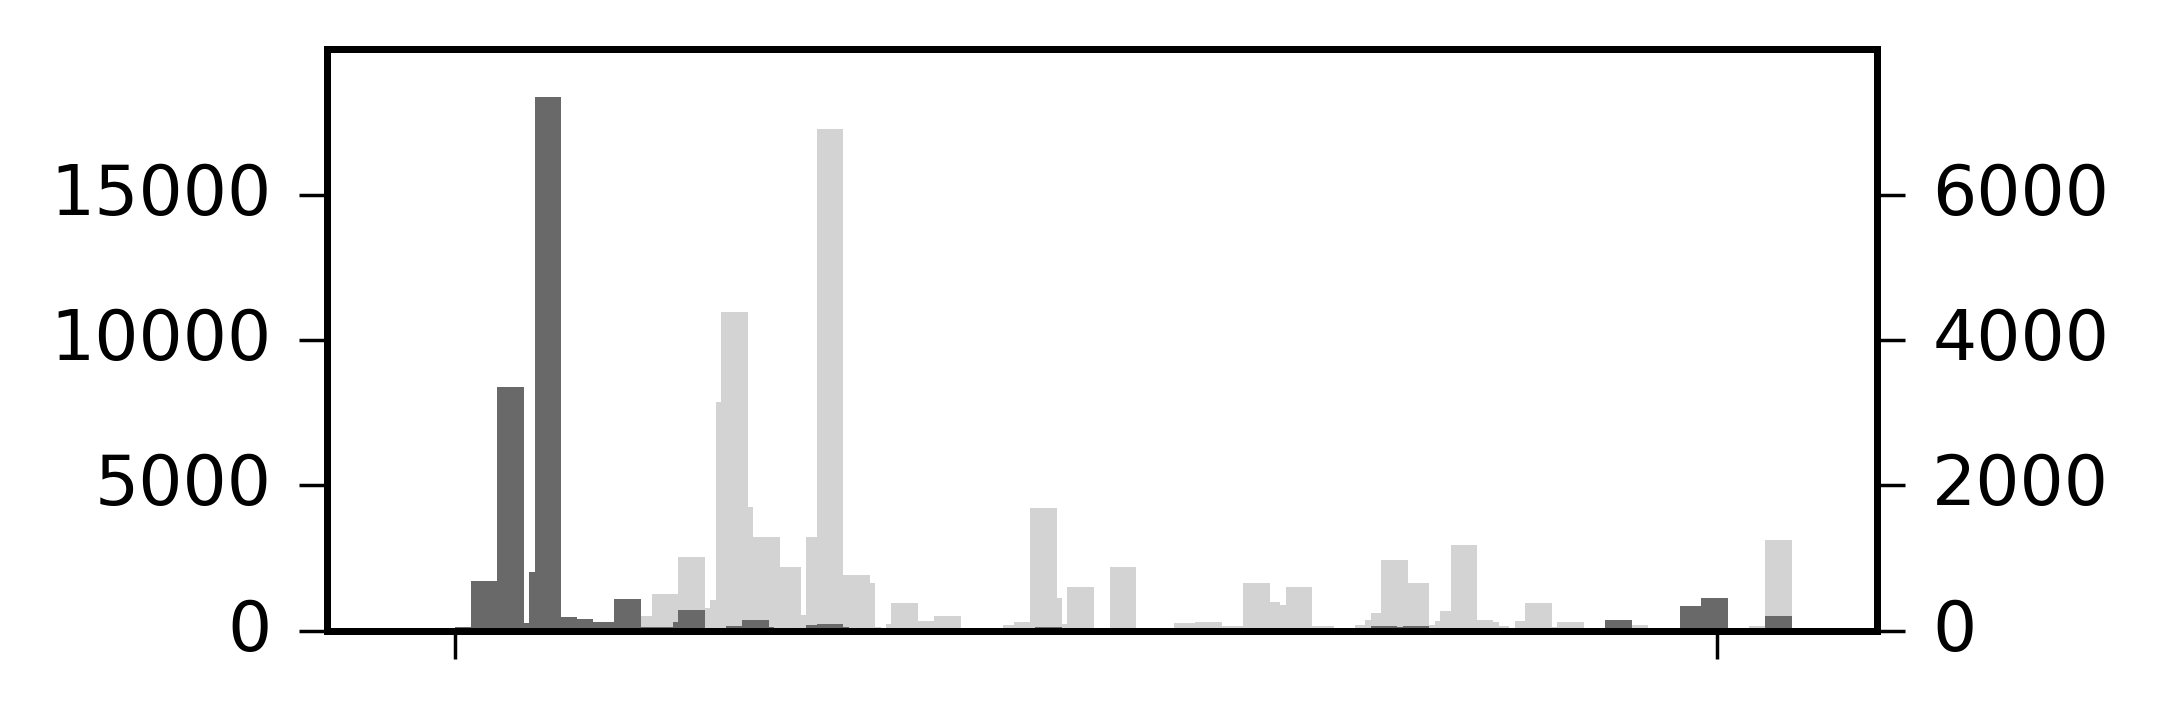

In [8]:
# lpp

AUG = 1755445 
length = 237
distance = 25
upstream = AUG-distance
downstream = AUG+length+distance-1
x_data = [x for x in range (1,length+distance*2+1)]

fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(4, 1.5)
plt.xticks([distance,length+distance],['',''])
plt.xlim(0,distance+length+distance)

ax2 = ax.twinx() 

readcounts = RC['ks61'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
ax.bar(x_data,data[1], width=5, color="lightgrey",linewidth = 0)
ax.set_ylim(0,20000)
ax.set_yticks([0,20000*(2/8.0),20000*(4/8.0),20000*(6/8.0)])

readcounts = RC['ks170'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
ax2.bar(x_data,data[1], width=5, color="dimgrey",linewidth = 0)
ax2.set_ylim(0,8000)
ax2.set_yticks([0,2000,4000,6000])
#plt.tick_params(labelsize=7)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#plt.savefig('fig_reta_rpm/reta_lpp_C.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0)

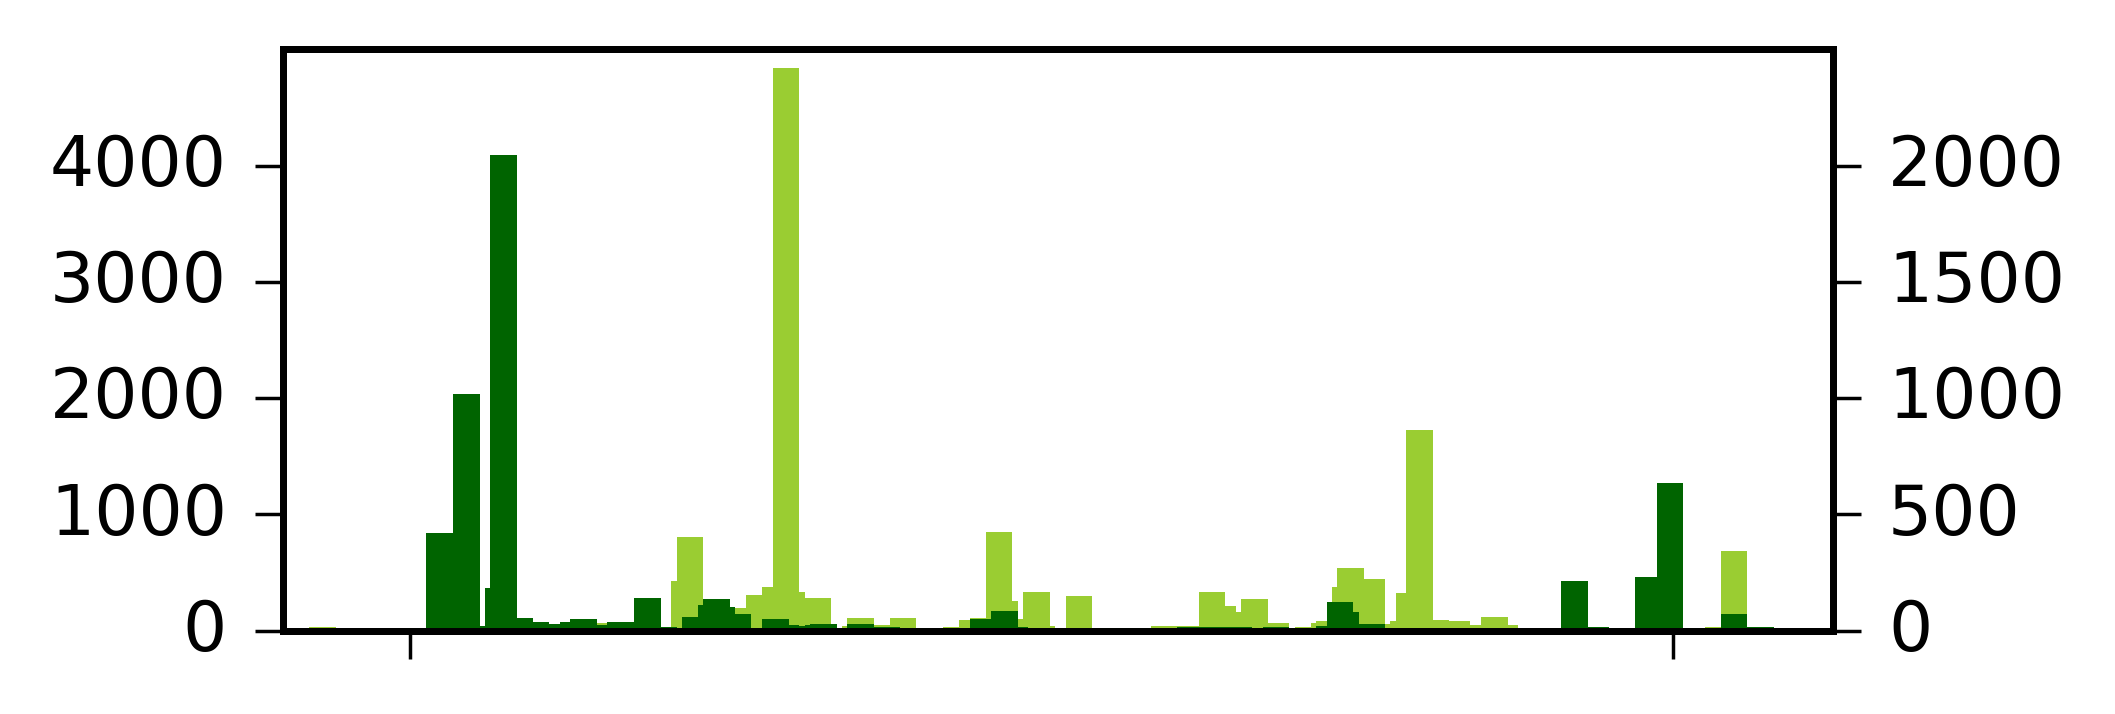

In [9]:
# lpp

AUG = 1755445 
length = 237
distance = 25
upstream = AUG-distance
downstream = AUG+length+distance-1
x_data = [x for x in range (1,length+distance*2+1)]

fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(4, 1.5)
plt.xticks([distance,length+distance],['',''])
plt.xlim(0,distance+length+distance)

ax2 = ax.twinx() 

readcounts = RC['ks64'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
ax.bar(x_data,data[1], width=5, color="yellowgreen",linewidth = 0)
ax.set_ylim(0,5000)
ax.set_yticks([0,1000,2000,3000,4000])

readcounts = RC['ks172'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
ax2.bar(x_data,data[1], width=5, color="darkgreen",linewidth = 0)
ax2.set_ylim(0,2500)
ax2.set_yticks([0,500,1000,1500,2000])
#plt.tick_params(labelsize=7)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#plt.savefig('fig_reta_rpm/reta_lpp_A.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0)